# TODO: find an interesting dataset
Find an interesing (free) dataset online with at least 5 training examples that is suitable for linear regression with one input variable. Paste the url to a link to the dataset and then complete the following problems. 

** *Paste URL of datset here.* **

**Answer:** https://www.kaggle.com/datasets/sunmarkil/auto-insurance-in-sweden-small-dataset

# Describe your problem
Briefly describe what $x$ and $y$ are in your data, and why it may be interesting to predict $y$ for a value of $x$ that is not in the training set.

** *Type your answer here* **

**Answer:** $x$ refers to the _Number of claims_ and $y$ refers to the _Total payment_. The linear regression problem is to predict the total payment made by an insurance company based on the number of claims made by the insured persons.

# Enter or load your data
Either enter your x and y training data directly here as numpy arrays, or load the data from file. If you choose the latter, make sure to include your data file in the submission!


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df_raw = pd.read_csv('insurance.csv', sep = 'delimiter', header = None,  engine = 'python')
df = df_raw.drop([0, 1, 2, 3], axis = 0).reset_index(drop = True).rename(columns = {0:'No_of_claims'})
df = df.No_of_claims.str.split(',',expand = True).rename(columns = {0:'No_of_claims', 1:'Total_payment'})
df.head()

,No_of_claims,Total_payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No_of_claims   63 non-null     object
 1   Total_payment  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [4]:
df.No_of_claims = pd.to_numeric(df.No_of_claims, errors = 'coerce')
df.Total_payment = pd.to_numeric(df.Total_payment, errors = 'coerce')

In [5]:
X = df.No_of_claims.to_numpy()
y = df.Total_payment.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [6]:
X_mean = np.mean(X_train)
y_mean = np.mean(y_train)
X_var = np.var(X_train)
y_var = np.var(y_train)

print('Mean of Number of claims :', X_mean)
print('Mean of Total payment settled(in 1000 swedish kronor) :', y_mean)
print('Variance of Number of claims :', X_var)
print('Variance of Total payment settled(in 1000 swedish kronor) :', y_var)

Mean of Number of claims : 18.386363636363637
Mean of Total payment settled(in 1000 swedish kronor) : 78.62272727272727
Variance of Number of claims : 228.37345041322314
Variance of Total payment settled(in 1000 swedish kronor) : 4443.694938016528


# Fit a linear regression model
Fit a linear regression model to your data. You can either reuse the code from the problem you just completed, or you can use the [linear regression model from scikit learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Scikit learn is a large module of machine learning algorithms that we will be using throughout the course. It is included in the Anaconda distribution.

In [7]:
def weights(x, y, degree):
    n = degree
    A = np.zeros((n + 1, n + 1))
    b = np.zeros((n + 1, 1))

    # Solving A b = c
    for i in range(n + 1):
        for j in range(n + 1):
            A[i, j] = sum(x ** (i + j))
        b[i] = sum(x ** (i) * y)

    # Generating weights for polynomial function with degree
    c = np.dot(np.linalg.inv(A), b)
    c = np.flip(c)
    c = c.ravel()
    return c

In [8]:
order = 1
coefficients = weights(X_train, y_train, order)
poly_fit = np.poly1d(coefficients)
y_fit = poly_fit(X_train)

# Plot the result
Plot your data and the best fitting hypothesis.

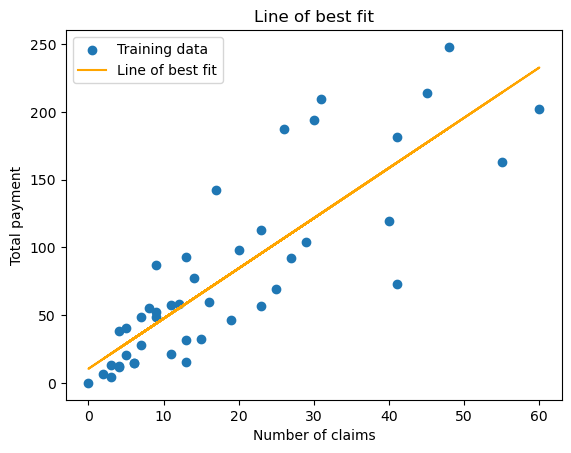

In [9]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_fit, color = 'orange')

plt.title('Line of best fit')
plt.xlabel('Number of claims')
plt.ylabel('Total payment')
plt.legend(['Training data', 'Line of best fit'])

# Make a prediction
Use the learned hypothesis to make a prediction for an input value $x$ that was not in the data set. Briefly discuss the result in the context of the data set you chose. Does the prediction seem useful?

In [10]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [11]:
y_pred = poly_fit(X_test)
rmse = rmse(y_pred, y_test)
print('Root Mean Squared (RMS) Error :', rmse)

Root Mean Squared (RMS) Error : 36.12176263358528


** *Type brief discussion here* **

**Answer:** The RMS error gives us an idea about how good our model is performing in terms of predicting the output for a random test point. From the hypothesis plot, it can be seen that the dataset is fairly linear. As such, using linear regression as the first approach to fit a model should work. The model helps the insurance company to get an idea about the total payment to be made based on a certain number of claims made by the insured persons.